In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# First we will import neccessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2 as cv
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Lambda
from PIL import Image

In [3]:
#load train data
path = "/content/drive/MyDrive/Diabetic Retinopathy Project/Dataset/train"
key_value= dict()
for i in os.listdir(path):
    if os.path.isdir(os.path.join(path, i)):
        key_value[i] = os.listdir(os.path.join(path, i))
dft = []
for key in key_value.keys():
    for j in key_value[key]:
        dft.append([key,os.path.join(path, key, j)])
df1 = pd.DataFrame(dft,columns=('label','path'))

In [4]:
df1

,label,path
0,DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
1,DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
2,DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
3,DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
4,DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
...,...,...
2071,No_DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
2072,No_DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
2073,No_DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
2074,No_DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...


In [5]:
df1.describe()

,label,path
count,2076,2076
unique,2,2076
top,DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
freq,1050,1


In [6]:
#load val data
path2 = "/content/drive/MyDrive/Diabetic Retinopathy Project/Dataset/valid"
key_value= dict()
for i in os.listdir(path2):
    if os.path.isdir(os.path.join(path2, i)):
        key_value[i] = os.listdir(os.path.join(path2, i))
dfv = []
for key in key_value.keys():
    for j in key_value[key]:
        dfv.append([key,os.path.join(path2, key, j)])
df2 = pd.DataFrame(dfv,columns=('label','path2'))
df2

,label,path2
0,DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
1,DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
2,DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
3,DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
4,DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
...,...,...
526,No_DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
527,No_DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
528,No_DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...
529,No_DR,/content/drive/MyDrive/Diabetic Retinopathy Pr...


Images Preprocessing

In [7]:
def readimg(path):
    img = cv.imread(path)

    img = cv.resize(img,(80,80))
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    return img

In [8]:
#processing train data

import multiprocessing

# Create a Pool with 4 worker processes
with multiprocessing.Pool(4) as p:
    # Read in all of the images in parallel
    images = p.map(readimg, df1['path'])
train_images=np.array(images, dtype='float')
# label encoder from sklearn
le = preprocessing.LabelEncoder()
train_labels = le.fit_transform(df1['label'])


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [9]:
#processing val data

import multiprocessing

# Create a Pool with 4 worker processes
with multiprocessing.Pool(4) as p:
    # Read in all of the images in parallel
    images = p.map(readimg, df2['path2'])
val_images=np.array(images, dtype='float')
# label encoder from sklearn
le = preprocessing.LabelEncoder()
val_labels = le.fit_transform(df2['label'])

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


CNN Model

Epoch 1/30
9/9 [==============================] - 10s 686ms/step - loss: 0.4160 - accuracy: 0.8237 - val_loss: 0.7693 - val_accuracy: 0.5386
Epoch 2/30
9/9 [==============================] - 6s 670ms/step - loss: 0.1884 - accuracy: 0.9297 - val_loss: 0.7503 - val_accuracy: 0.5386
Epoch 3/30
9/9 [==============================] - 6s 676ms/step - loss: 0.1638 - accuracy: 0.9427 - val_loss: 0.7319 - val_accuracy: 0.5386
Epoch 4/30
9/9 [==============================] - 6s 694ms/step - loss: 0.1484 - accuracy: 0.9465 - val_loss: 0.7177 - val_accuracy: 0.5386
Epoch 5/30
9/9 [==============================] - 6s 686ms/step - loss: 0.1214 - accuracy: 0.9644 - val_loss: 0.7079 - val_accuracy: 0.5386
Epoch 6/30
9/9 [==============================] - 6s 660ms/step - loss: 0.1048 - accuracy: 0.9672 - val_loss: 0.6950 - val_accuracy: 0.5386
Epoch 7/30
9/9 [==============================] - 6s 651ms/step - loss: 0.0941 - accuracy: 0.9716 - val_loss: 0.6880 - val_accuracy: 0.5386
Epoch 8/30
9/9 [===

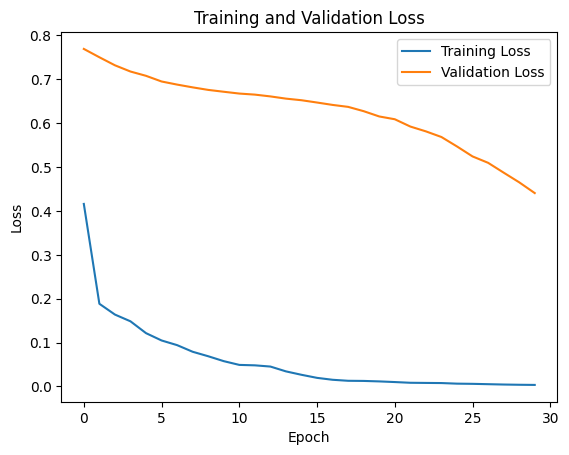

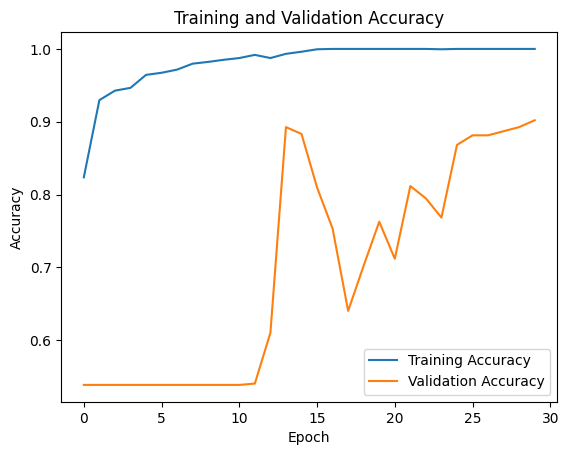

In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Define your model
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(80, 80, 1)),
    keras.layers.Conv2D(526, kernel_size=(3, 3), activation="sigmoid"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation="sigmoid"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation="sigmoid"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="sigmoid"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(2, activation="softmax")
])

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Train the model and store the training history
history = model.fit(train_images, train_labels, epochs=30, batch_size=256, validation_data=(val_images, val_labels), callbacks=[es])

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [18]:
path = "/content/drive/MyDrive/Diabetic Retinopathy Project/Dataset/test"
key_value= dict()
for i in os.listdir(path2):
    if os.path.isdir(os.path.join(path, i)):
        key_value[i] = os.listdir(os.path.join(path, i))
dft = []
for key in key_value.keys():
    for j in key_value[key]:
        dft.append([key,path+'/'+key+'/'+j])
dft = pd.DataFrame(dft,columns=('label','path'))

In [19]:
with multiprocessing.Pool(4) as p:
    # Read in all of the images in parallel
    test_images = p.map(readimg, dft['path'])

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [20]:
test_images=np.array(test_images, dtype='float')
# label encoder from sklearn
le = preprocessing.LabelEncoder()
test_labels = le.fit_transform(dft['label'])

In [21]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
predictions = model.predict(test_images)

# Convert the predictions to the class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the accuracy score
accuracy = accuracy_score(test_labels, predicted_labels)

print('Accuracy:', accuracy)

8/8 [==============================] - 0s 28ms/step
Accuracy: 0.9047619047619048


In [22]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(test_labels, predicted_labels)

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


# Assuming y_true is the true labels and y_pred is the predicted labels
print(classification_report(test_labels, predicted_labels))

test_labels = le.inverse_transform(test_labels)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       113
           1       0.94      0.87      0.90       118

    accuracy                           0.90       231
   macro avg       0.91      0.91      0.90       231
weighted avg       0.91      0.90      0.90       231



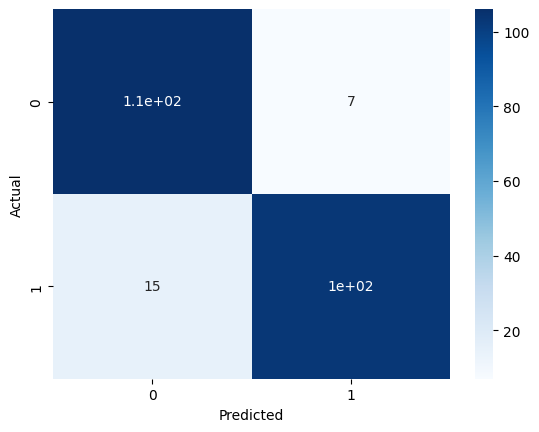

In [23]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
model.save('/content/drive/MyDrive/Diabetic Retinopathy Project/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# Flatten the images
num_train_samples, height, width = train_images.shape
flattened_train_images = train_images.reshape(num_train_samples, -1)

num_test_samples, _, _ = test_images.shape
flattened_test_images = test_images.reshape(num_test_samples, -1)

# Split the data into training and testing sets
X_train = flattened_train_images
X_test = flattened_test_images
y_train = train_labels
y_test = test_labels

# Create and train a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Convert predicted labels to strings
y_pred_strings = np.array(['DR' if pred == 0 else 'No_DR' for pred in y_pred])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_strings)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8614718614718615


In [26]:
from sklearn.metrics import classification_report

# Generate classification report
classification_rep = classification_report(y_test, y_pred_strings)

# Print the classification report
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

          DR       0.85      0.87      0.86       113
       No_DR       0.87      0.86      0.86       118

    accuracy                           0.86       231
   macro avg       0.86      0.86      0.86       231
weighted avg       0.86      0.86      0.86       231



In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Convert string labels to integers
label_mapping = {'DR': 0, 'No_DR': 1}
y_test_int = np.array([label_mapping[label] for label in y_test])

# Create and train a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Generate classification report
classification_rep_knn = classification_report(y_test_int, y_pred_knn)

# Print the classification report
print("Classification Report for KNN:\n", classification_rep_knn)


Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       113
           1       0.92      0.89      0.91       118

    accuracy                           0.90       231
   macro avg       0.90      0.91      0.90       231
weighted avg       0.91      0.90      0.90       231

